In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# DBSCAN

## DBSCAN 개요
- DBSCAN : Density Based Spatial Clustering of Applications with Noise
- 밀도 기반의 군집화 알고리즘
    - 특정 공간 내에 데이터 밀도 차이를 기반
- 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화 가능
- 복잡한 기하학적 분포도를 갖는 데이터 세트에 대해서도 군집화 가능

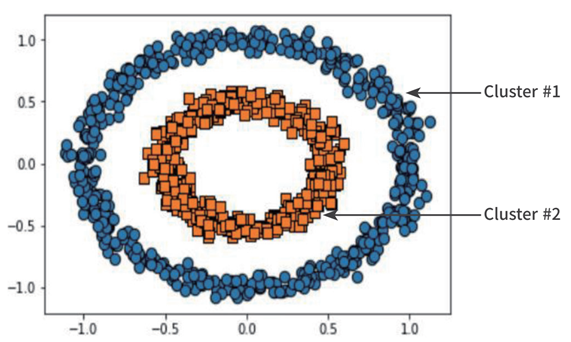

### DBSCAN을 구성하는 두 가지 파라미터
- Epsilon : 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
- min points : 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수

**데이터 포인트 구분**

: 입실론 주변 영역 내 포함되는 최소 데이터 개수를 충족시키는 기준에 따라 구분
- 핵심 포인트(core point) 
    - 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우
- 이웃 포인트(neighbor point)
    - 주변 영역 내에 위치한 타 데이터
- 경계 포인트(border point)
    - 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인터를 가지고 있지 않지만 핵심 포인트를 이웃 포인터로 가지고 있는 데이터
- 잡음 포인트(noise point)
    - 최소 데이터 개수 이상의 이웃 포인터를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트도 가지고 있지 않는 데이터


### DBSCAN 군집화 과정(사례)
: 최소데이터 개수는 5인 경우

1. p1~p12 까지 12개 데이터 세트
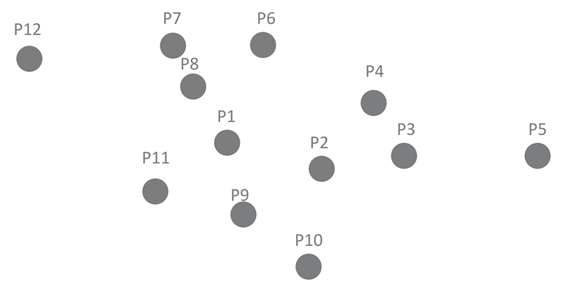


2. **p1** 데이터를 기준으로 입실론 반경 내에 포함된 데이터가 7개(자신p1, p2, p6, p7, p8, p9, p11)로 최소 데이터 5개 이상을 만족하므로 p1은 **`핵심 포인트`** 이다
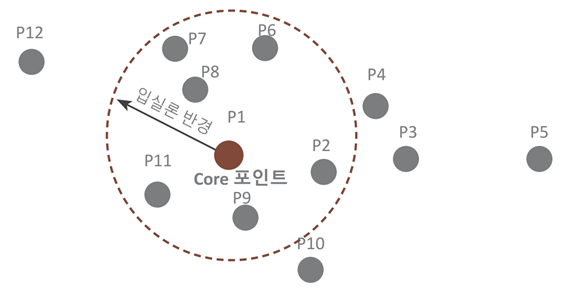


3. **p2** 데이터 포인트는 반경 내에 6개 데이터(p2, 이웃데이터 p1, p3, p4, p9, p10)를 가지고 있으므로 **`핵심 포인트`** 이다
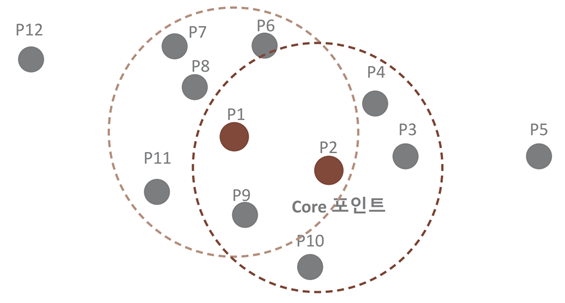


4. 핵심포인트 p1의 이웃 데이터 포인트 p2 역시 핵심포인트일 경우 p1에서 p2로 **연결해 직접 접근이 가능** 하다.
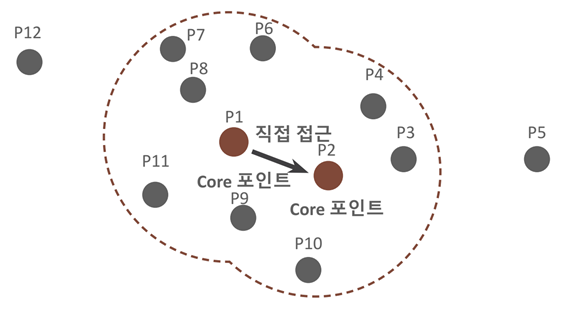


5. 특정 핵심 포인트에서 직접 접근이 가능한 다른 핵심포인트를 서로 연결하면서 군집화를 구성한다. 이러한 방식으로 점차적으로 군집(cluster) 영역을 확장해 나간다(=> **`DBSCAN 군집화 방식`** )
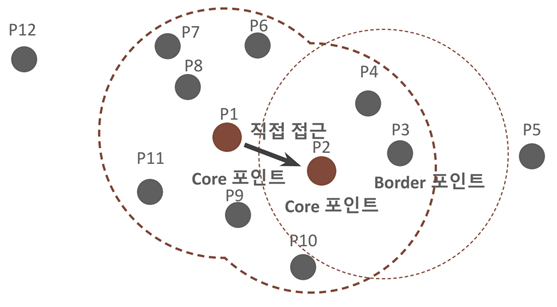


6. **p3** 데이터의 경우 반경 내에 포함되는 이웃 데이터는 p2, p4로 군집으로 분류할 수 있는 핵심 포인트가 되지 못한다. 그러나 이웃 데이터 중 핵심 포인트 p2를 가지고 있으므로 **`경계 포인트`** 가 되며 군집의 외곽을 형성한다.
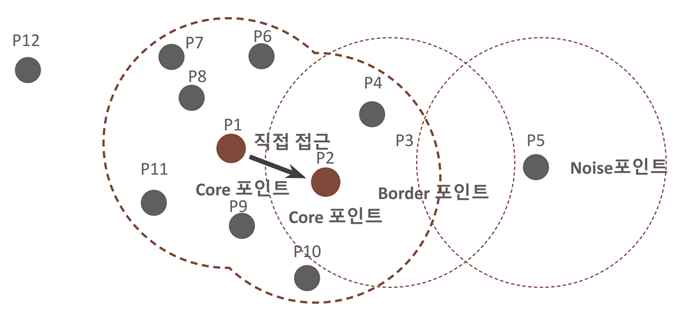



7. **p5**와 같이 반경 내에 최소 데이터를 가지고 있지 않고 핵심 포인트를 이웃 포인트로 가지고 있지 않는 데이터는 **`잡음 포인터`** 이다. 

### 사이킷런에서 DBSCAN 클래스 `DBSCAN`

DBSCAN 초기화 파라미터
- eps : 입실론 주변 영역의 반경
- min_samples : 핵심포인트가 되기 위한 입실론 주변 영역 내에 포함될 데이터의 최소 개수(자신의 데이터 포함)

### DBSCAN 적용하기 – 붓꽃 데이터 셋

In [2]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 
### 클러스터링 결과를 시각화하는 함수

def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

In [3]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris

In [12]:
iris = load_iris()
ftr_names = ['sepal_length','sepal_width','petal_length','petal_width']
iris_df = pd.DataFrame(data = iris.data, columns= ftr_names)
iris_df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
dbscan = DBSCAN(eps= 0.6, min_samples= 8, metric= 'euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)
iris_df['dbscan_cluster'] = dbscan_labels
np.unique(dbscan_labels, return_counts=True)
iris_df['target'] = iris.target

In [15]:
iris_df.groupby('target')['dbscan_cluster'].value_counts()

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: count, dtype: int64

**PCA를 적용하여 2차원 데이터 세트로 변환 후 DBSCAN 군집화 결과 시각화**

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 2, random_state= 0)
pca_transform = pca.fit_transform(iris.data)

iris_df['ftr1'] = pca_transform[:,0]
iris_df['ftr2'] = pca_transform[:,1]

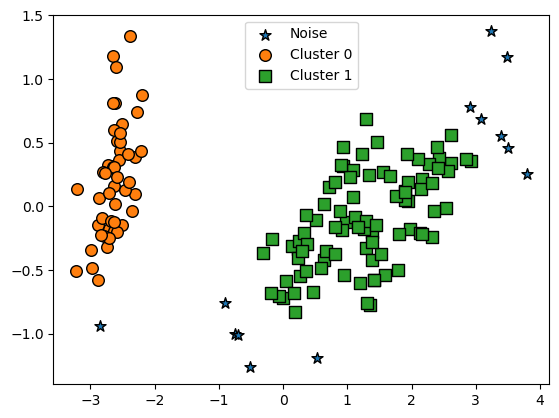

In [18]:
visualize_cluster_plot(dbscan, iris_df, 'dbscan_cluster', iscenter= False)

- DBSCAN의 하이퍼파라미터 변경을 통한 군집분석

- eps 반격크기: 0.6 -> 0.8

In [19]:
dbscan = DBSCAN(eps= 0.8, min_samples= 8, metric= 'euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)
iris_df['dbscan_cluster'] = dbscan_labels
np.unique(dbscan_labels, return_counts=True)

(array([-1,  0,  1], dtype=int64), array([ 3, 50, 97], dtype=int64))

In [20]:
iris_df.groupby('target')['dbscan_cluster'].value_counts()

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: count, dtype: int64

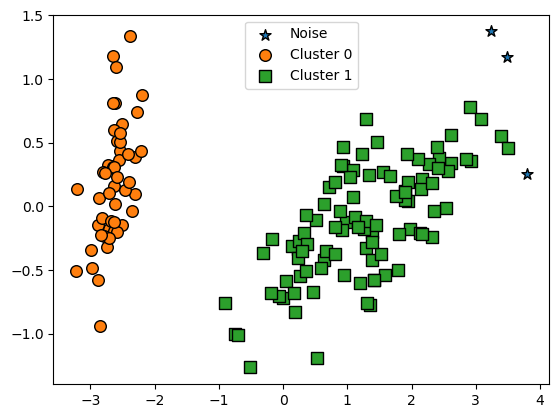

In [21]:
visualize_cluster_plot(dbscan, iris_df, 'dbscan_cluster', iscenter= False)

=> eps 반격크기: 0.6보다 0.8이 noise가 줄었다. <br>
=> eps를 크게하면 반경이 커져서 포함하는 데이터가 많아지므로 noise 개수도 줄어듦.

- min_samples 변경
    - 8 -> 6

In [41]:
def operating_DBSCAN(df, eps= 0.6, min_samples= 8, metric='euclidean'):
    dbscan = DBSCAN(eps= eps, min_samples= min_samples, metric= metric)
    dbscan_labels = dbscan.fit_predict(iris.data)
    df['dbscan_cluster'] = dbscan_labels
    np.unique(dbscan_labels, return_counts=True)
    
    print(df.groupby('target')['dbscan_cluster'].value_counts())
    visualize_cluster_plot(dbscan, df, 'dbscan_cluster', iscenter= False)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                44
        -1                 6
Name: count, dtype: int64


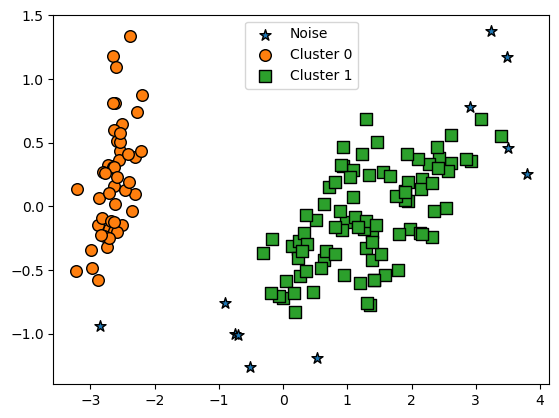

In [42]:
# min_samples= 6
operating_DBSCAN(iris_df , eps= 0.6, min_samples= 6, metric='euclidean')

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: count, dtype: int64


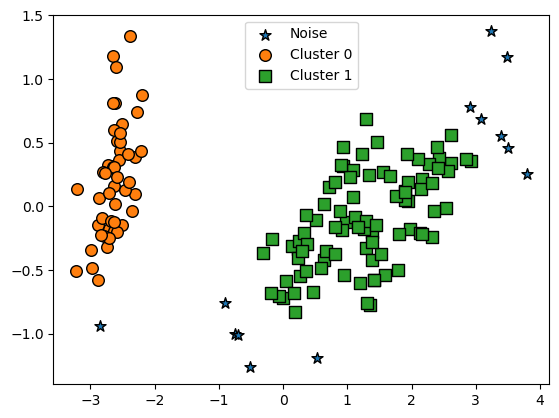

In [31]:
# min_samples= 8
operating_DBSCAN(iris_df , eps= 0.6, min_samples= 8, metric='euclidean')

target  dbscan_cluster
0        0                48
        -1                 2
1        1                46
        -1                 4
2        1                38
        -1                12
Name: count, dtype: int64


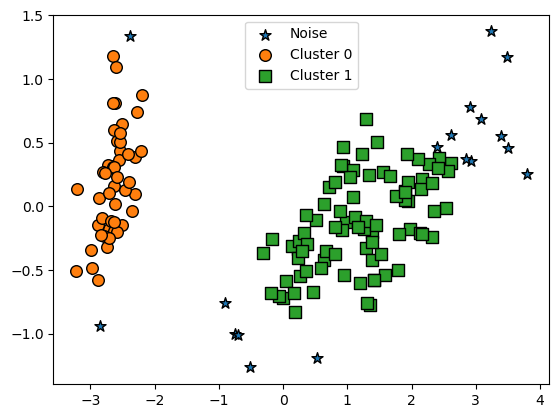

In [32]:
# min_samples= 12
operating_DBSCAN(iris_df , eps= 0.6, min_samples= 12, metric='euclidean')

=> min_samples가 커질수록 noise가 증가한다.

### DBSCAN 적용하기 – make_circles() 데이터 세트

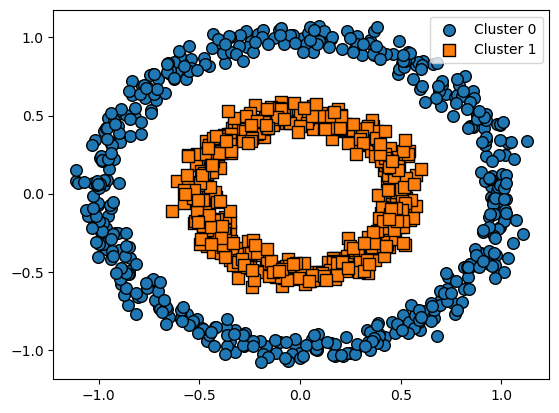

In [34]:
from sklearn.datasets import make_circles

x,y = make_circles(n_samples= 1000, shuffle= True, noise= 0.05, random_state= 0 ,factor= 0.5)

df = pd.DataFrame(data= x, columns= ['ftr1','ftr2'])
df['target']= y
visualize_cluster_plot(None, df, 'target', iscenter= False)

- KMeans 적용

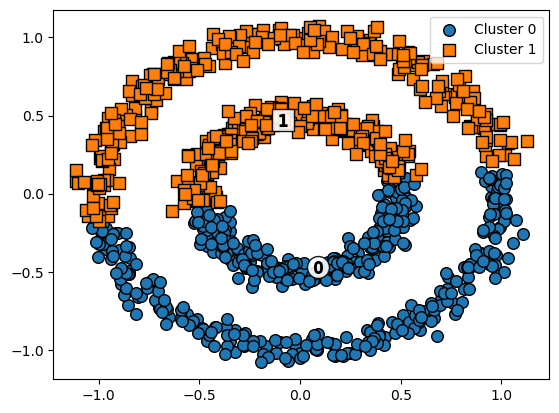

In [37]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 2, max_iter= 1000, random_state= 0)
kmeans_labels = kmeans.fit_predict(x)
df['KMeans_labels'] = kmeans_labels
visualize_cluster_plot(kmeans, df, 'KMeans_labels', iscenter= True)

- GMM 적용

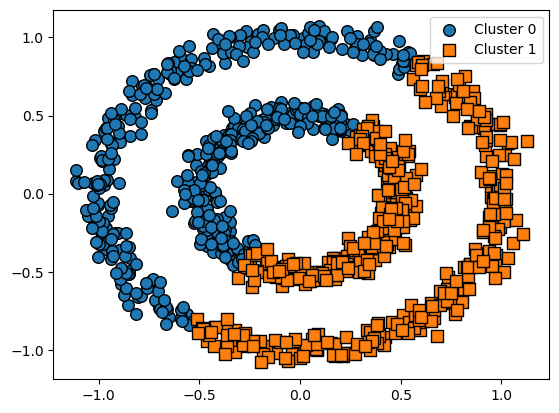

In [39]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components= 2, random_state= 0)
gmm_labels = gmm.fit_predict(x)
df['GMM_labels'] = gmm_labels
visualize_cluster_plot(gmm, df, 'GMM_labels', iscenter= False)

- DBSCAN 적용

In [54]:
def operating_DBSCAN2(df, data, eps= 0.5, min_samples= 8, metric='euclidean'):
    dbscan = DBSCAN(eps= eps, min_samples= min_samples, metric= metric)
    dbscan_labels = dbscan.fit_predict(data)
    df['dbscan_cluster'] = dbscan_labels
    visualize_cluster_plot(dbscan, df, 'dbscan_cluster', iscenter= False)

-- eps= 0.1, min_samples= 5 --


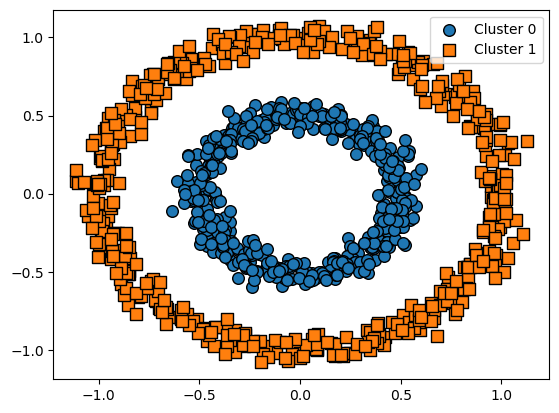

-- eps= 0.2, min_samples= 5 --


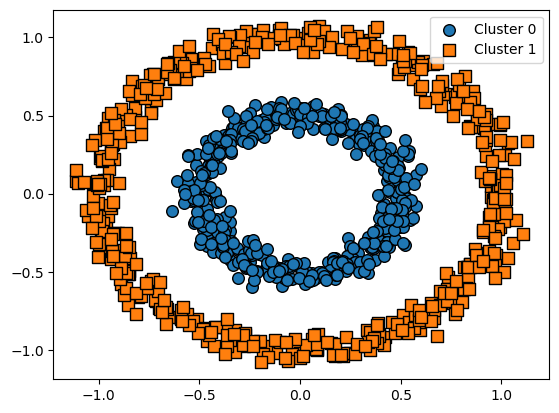

-- eps= 0.3, min_samples= 5 --


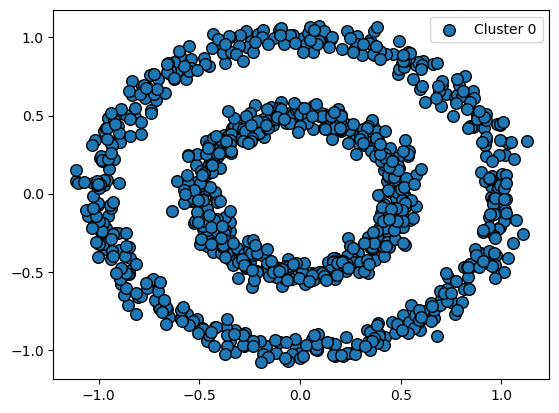

-- eps= 0.4, min_samples= 5 --


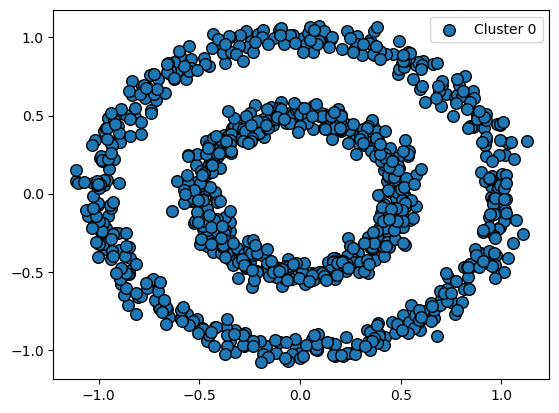

-- eps= 0.5, min_samples= 5 --


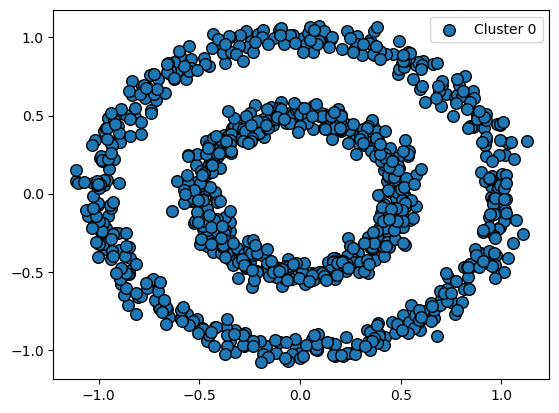

-- eps= 0.1, min_samples= 6 --


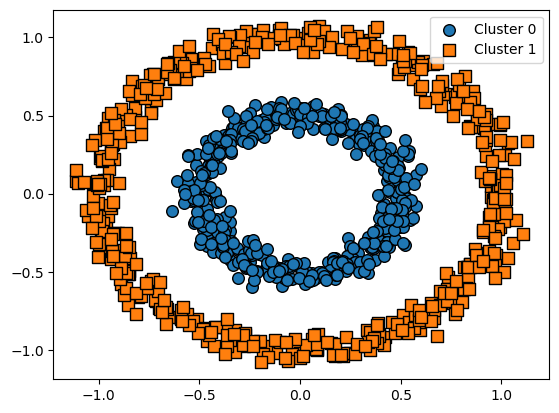

-- eps= 0.2, min_samples= 6 --


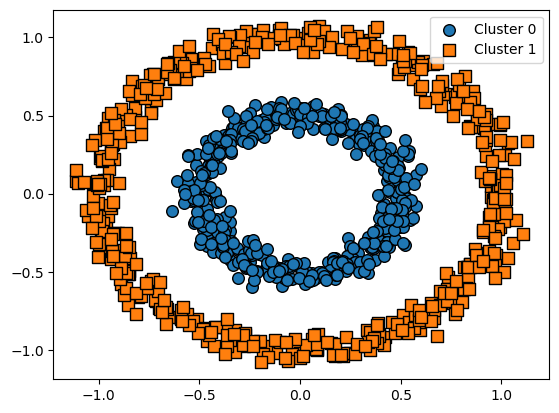

-- eps= 0.3, min_samples= 6 --


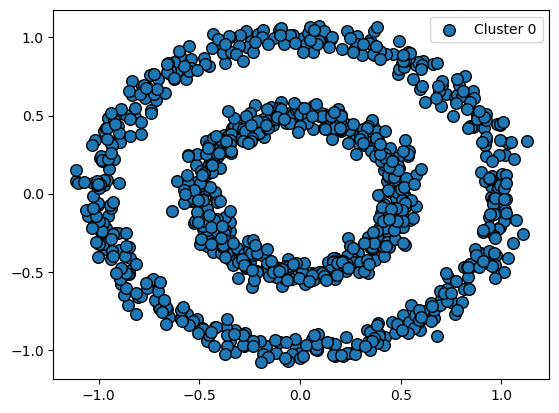

-- eps= 0.4, min_samples= 6 --


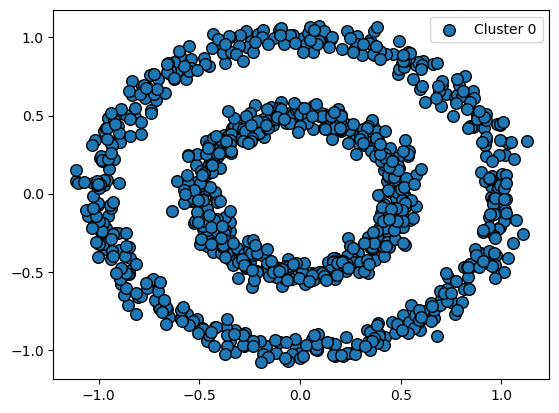

-- eps= 0.5, min_samples= 6 --


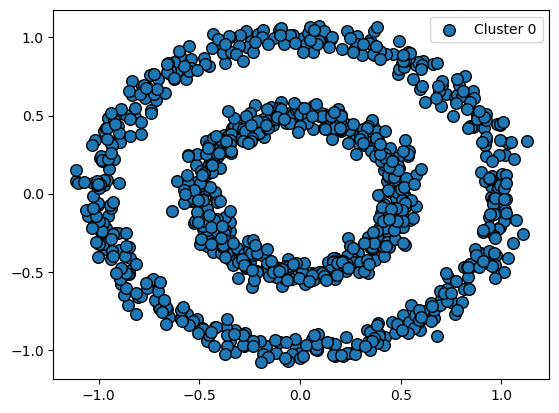

-- eps= 0.1, min_samples= 7 --


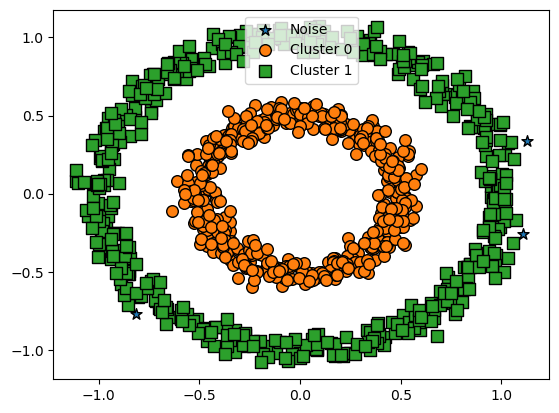

-- eps= 0.2, min_samples= 7 --


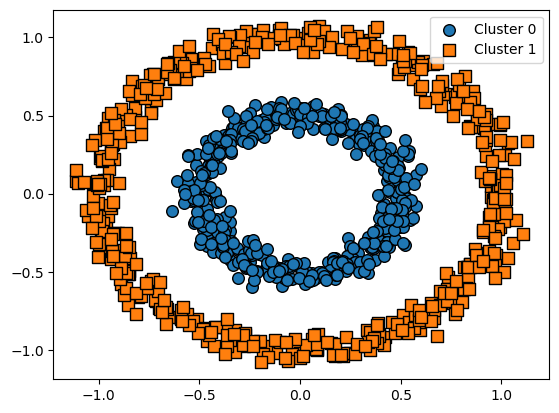

-- eps= 0.3, min_samples= 7 --


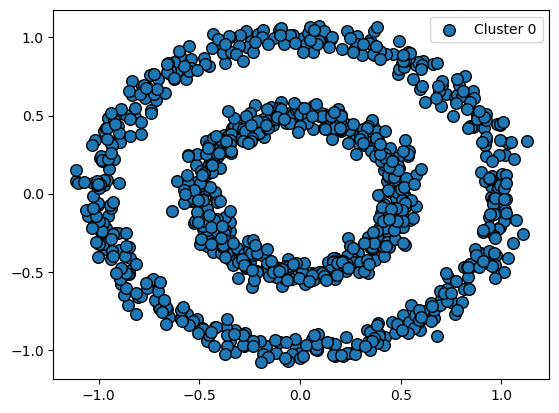

-- eps= 0.4, min_samples= 7 --


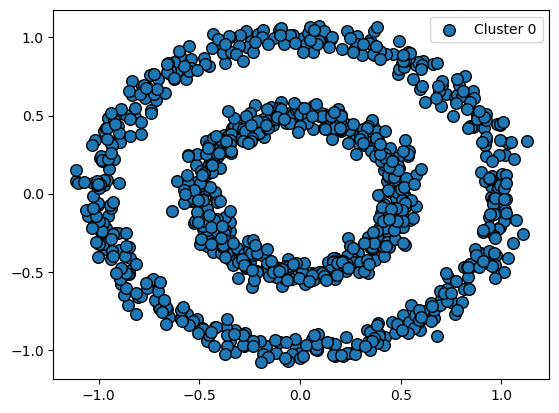

-- eps= 0.5, min_samples= 7 --


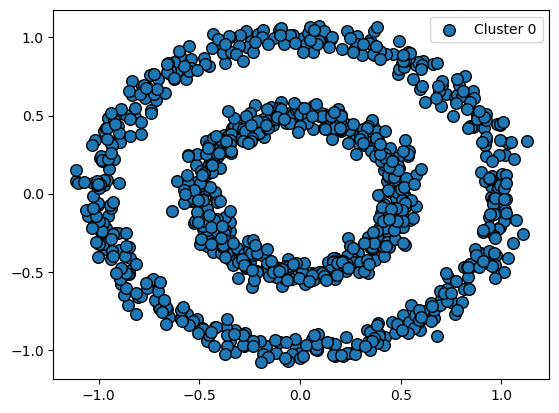

-- eps= 0.1, min_samples= 8 --


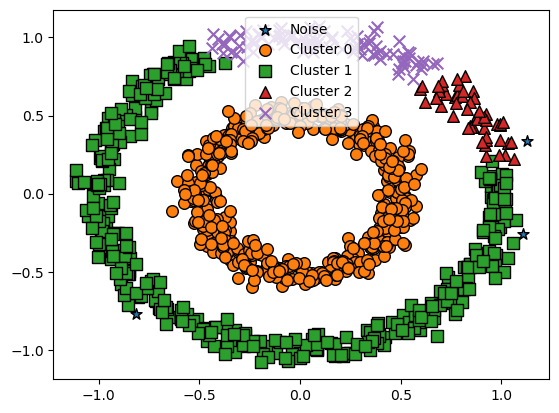

-- eps= 0.2, min_samples= 8 --


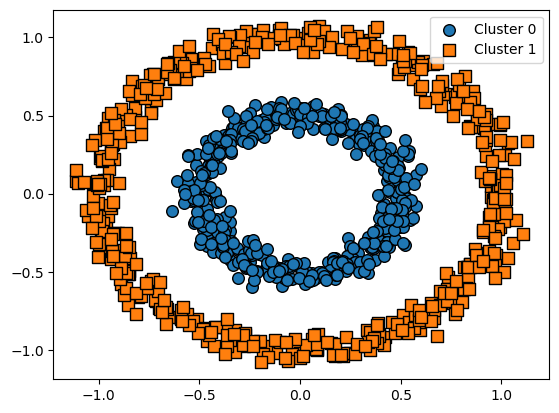

-- eps= 0.3, min_samples= 8 --


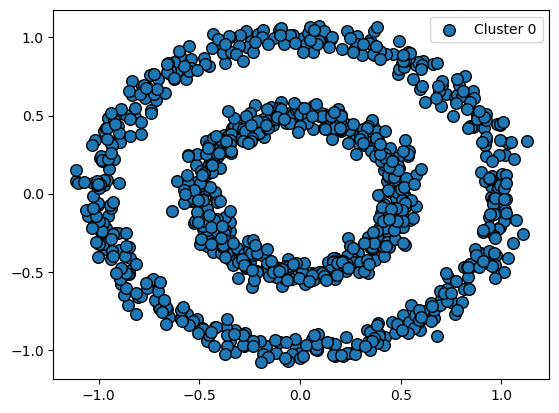

-- eps= 0.4, min_samples= 8 --


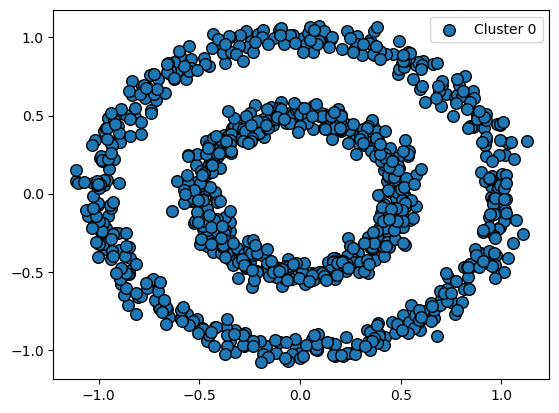

-- eps= 0.5, min_samples= 8 --


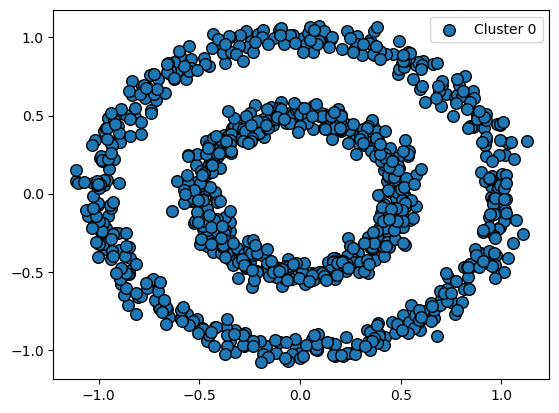

In [58]:
for n in [5,6,7,8]:
    for eps in [0.1,0.2,0.3,0.4,0.5]:
        print(f'-- eps= {eps}, min_samples= {n} --')
        operating_DBSCAN2(df, data= x, eps= eps, min_samples= n, metric='euclidean')

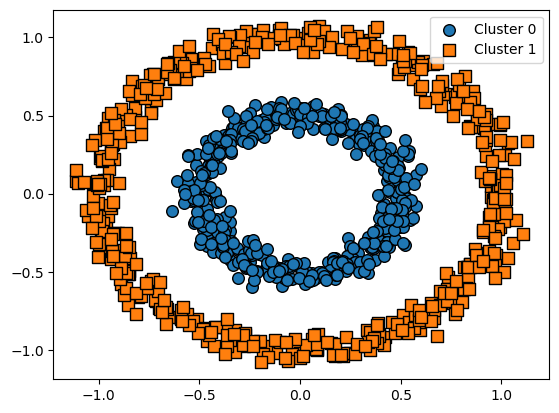

In [53]:
dbscan = DBSCAN(eps= 0.2, min_samples= 8, metric= 'euclidean')
dbscan_labels = dbscan.fit_predict(x)
df['DBSCAN_labels'] = dbscan_labels
visualize_cluster_plot(dbscan, df, 'DBSCAN_labels', iscenter= False)

-----